In [1]:
from utils import show_train_example, train_labels, datapath
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf

%matplotlib inline



In [2]:
train_labels.label.value_counts()

plate    1227
cup      1135
spoon     989
knife     909
glass     742
fork      557
Name: label, dtype: int64

<AxesSubplot:>

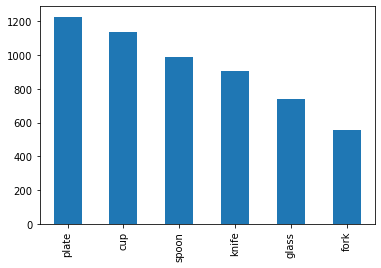

In [34]:
train_labels.label.value_counts().plot(kind='bar')


Showing examples of class: glass


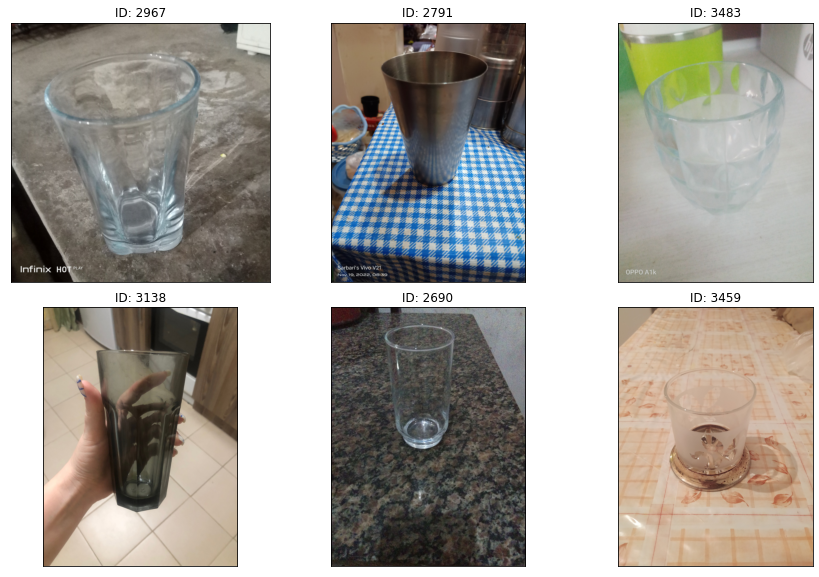

In [35]:


show_train_example('glass')



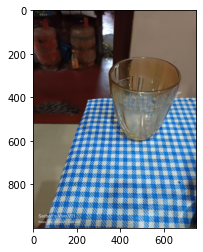

In [36]:
example_image = plt.imread(datapath + 'images/2480.jpg')

plt.imshow(example_image)


In [37]:
(1000 - 3 + 0) / 1 + 1

998.0

In [38]:
image = tf.keras.preprocessing.image.load_img(datapath + 'images/2480.jpg', color_mode = 'grayscale')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_shape = input_arr.shape


model = Sequential()

model.add(Conv2D(1, kernel_size=2, activation='linear', input_shape =  input_shape))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

pred = model.predict(np.array([input_arr]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 999, 749, 1)       5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 378ms/step


In [56]:
#print exactly first 2x2 pixels of input image
print('input 2x2')
input_chunk = input_arr[0:2, 0:2, 0]
print(input_chunk)

#print bias
print('bias')
bias = model.layers[0].get_weights()[1][0]
print(bias)

#print the kernel 
print('kernel')
kernel = model.layers[0].get_weights()[0][:,:,0,0]
print(kernel)


#print the first pixel of the output
print('output')
print(pred[0,0,0,0])


#print np.sum(input_chunk*kernel) + bias
res = np.sum(input_chunk*kernel) + bias
print('result')

input 2x2
[[22. 24.]
 [24. 24.]]
bias
0.0
kernel
[[ 0.56634456 -0.40483153]
 [-0.32454622 -0.63704354]]
output
-20.334532
result


In [78]:
#print exactly first 2x2 pixels of input image
print('input 4x4')
input_chunk = input_arr[0:4, 0:4, 0]
print(input_chunk)
input_chunk = input_arr[0:2, 1:3, 0]
print(input_chunk)


#print bias
print('bias')
bias = model.layers[0].get_weights()[1][0]
print(bias)

#print the kernel 
print('kernel')
kernel = model.layers[0].get_weights()[0][:,:,0,0]
print(kernel)


#print the first pixel of the output
print('output')
print(pred[0,0,1,0])


#print np.sum(input_chunk*kernel) + bias
print('result')
res = np.sum(input_chunk*kernel) + bias
print(res)

input 4x4
[[22. 24. 24. 22.]
 [24. 24. 23. 21.]
 [25. 24. 23. 21.]
 [25. 25. 24. 22.]]
[[24. 24.]
 [24. 23.]]
bias
0.0
kernel
[[ 0.56634456 -0.40483153]
 [-0.32454622 -0.63704354]]
output
-18.564796
result
-18.564796
